In [138]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Notebook styling
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Define a custom formatting function to add commas to large numbers
def format_with_commas(x):
    if abs(x) >= 1e6:
        return '{:,.0f}'.format(x)
    else:
        return '{:.2f}'.format(x)

# Set the display option to use the custom formatting function
pd.options.display.float_format = format_with_commas

# Open CS file
df = pd.read_csv('health.csv')

In [139]:
df

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0,50,"3,093,457",Male,Bachelor's Degree,4.97,16.63,200.42,70.92,150.40,125.57,Excellent
1,1,44,"5,545,445",Male,Bachelor's Degree,5.83,13.26,201.01,70.67,149.29,125.60,Fair
2,2,25,"4,401,808",Male,Master's Degree,5.59,11.14,200.11,67.46,150.02,127.09,Excellent
3,3,41,"4,606,865",Female,High School,6.27,9.14,199.65,67.57,150.36,117.39,Poor
4,4,24,"6,956,049",Male,Bachelor's Degree,5.90,9.78,199.33,79.60,149.73,114.16,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,22,"2,072,546",Male,Master's Degree,5.36,14.43,200.70,49.57,150.11,113.66,Fair
1996,1996,25,"7,456,909",Female,Master's Degree,5.50,5.35,198.99,73.59,149.83,107.86,Excellent
1997,1997,44,"5,560,391",Male,PhD,7.03,3.75,200.58,44.49,150.59,138.21,Poor
1998,1998,20,"3,436,759",Male,Bachelor's Degree,5.69,5.72,200.21,85.26,150.83,127.52,Good


### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

In [140]:
def describeDataNumbers(df, attribute):
    mean = df[attribute].mean()
    median = df[attribute].median()
    mode = df[attribute].mode()
    standardDeviation = df[attribute].std()
    variance = df[attribute].var()
    rangeData = df[attribute].max() - df[attribute].min()
    minimum = df[attribute].min()
    maximumAge = df[attribute].max()
    firstQuartile = df[attribute].quantile(0.25)
    secondQuartile = df[attribute].quantile(0.5)
    thirdQuartile = df[attribute].quantile(0.75)
    interQuartileRange = thirdQuartile - firstQuartile
    skewness = df[attribute].skew()
    kurtosis = df[attribute].kurt()

    print(f'Deskripsi Data {attribute}:')
    print(f'Rata-rata {attribute}: {mean}')
    print(f'Median {attribute}: {median}')
    print(f'Modus {attribute}: {mode.to_list()[0]}')
    print(f'Standar Deviasi {attribute}: {standardDeviation}')
    print(f'Variansi {attribute}: {variance}')
    print(f'Range {attribute}: {rangeData}')
    print(f'Minimum {attribute}: {minimum}')
    print(f'Maksimum {attribute}: {maximumAge}')
    print(f'Kuartil Pertama {attribute}: {firstQuartile}')
    print(f'Kuartil Kedua {attribute}: {secondQuartile}')
    print(f'Kuartil Ketiga {attribute}: {thirdQuartile}')
    print(f'Interquartile Range {attribute}: {interQuartileRange}')
    print(f'Skewness {attribute}: {skewness}')
    print(f'Kurtosis {attribute}: {kurtosis}\n')

def describeDataWords(df, attribute):
    uniqueValues = df[attribute].value_counts()
    proporsi = df[attribute].value_counts(normalize=True)

    print(f'Deskripsi Data {attribute}:')
    print(f'Jumlah data unik {attribute}:')
    print(uniqueValues)
    print(f'Proporsi data unik {attribute}:')
    print(proporsi)
    print()

describeDataNumbers(df, 'Age')
describeDataNumbers(df, 'Income')
describeDataWords(df, 'Gender')
describeDataWords(df, 'Education')
describeDataNumbers(df, 'Stress_Level')
describeDataNumbers(df, 'Exercise_Hours_Per_Week')
describeDataNumbers(df, 'Cholesterol_Level')
describeDataNumbers(df, 'Weight')
describeDataNumbers(df, 'Height')
describeDataNumbers(df, 'Blood_Pressure')
describeDataWords(df, 'Health_Status')


Deskripsi Data Age:
Rata-rata Age: 39.4175
Median Age: 39.0
Modus Age: 53
Standar Deviasi Age: 11.560753403633772
Variansi Age: 133.65101925962983
Range Age: 39
Minimum Age: 20
Maksimum Age: 59
Kuartil Pertama Age: 30.0
Kuartil Kedua Age: 39.0
Kuartil Ketiga Age: 49.25
Interquartile Range Age: 19.25
Skewness Age: -0.005292021408066734
Kurtosis Age: -1.2033917756655756

Deskripsi Data Income:
Rata-rata Income: 4889928.319474319
Median Income: 4898900.675226251
Modus Income: -1088986.5264049638
Standar Deviasi Income: 2010795.0245210964
Variansi Income: 4043296630638.797
Range Income: 13316478.756404964
Minimum Income: -1088986.5264049638
Maksimum Income: 12227492.23
Kuartil Pertama Income: 3580713.61116128
Kuartil Kedua Income: 4898900.675226251
Kuartil Ketiga Income: 6271595.199348878
Interquartile Range Income: 2690881.588187598
Skewness Income: -0.006350937045968082
Kurtosis Income: -0.03156192513024303

Deskripsi Data Gender:
Jumlah data unik Gender:
Gender
Female    1011
Male      

### 2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

In [141]:
def handleOutlier(df, attribute):
    new_df = df.copy()

    firstQuartile = new_df[attribute].quantile(0.25)
    thirdQuartile = new_df[attribute].quantile(0.75)
    interQuartileRange = thirdQuartile - firstQuartile

    lowerBound = firstQuartile - 1.5 * interQuartileRange
    upperBound = thirdQuartile + 1.5 * interQuartileRange

    median = new_df[attribute].median()
    new_df[attribute] = new_df[attribute].apply(lambda x: median if x < lowerBound or x > upperBound else x)

    return new_df

new_df = handleOutlier(df, 'Age')
new_df = handleOutlier(new_df, 'Income')
new_df = handleOutlier(new_df, 'Stress_Level')
new_df = handleOutlier(new_df, 'Exercise_Hours_Per_Week')
new_df = handleOutlier(new_df, 'Cholesterol_Level')
new_df = handleOutlier(new_df, 'Weight')
new_df = handleOutlier(new_df, 'Height')
new_df = handleOutlier(new_df, 'Blood_Pressure')

print('Terdapat outlier dalam dataset yang diberikan')
print('Outlier tersebut dapat ditangani dengan mengubah nilai outlier menjadi nilai median dari atribut tersebut')
print('\nBerikut merupakan deskripsi singkat data setelah outlier ditangani:')
new_df.describe()

Terdapat outlier dalam dataset yang diberikan
Outlier tersebut dapat ditangani dengan mengubah nilai outlier menjadi nilai median dari atribut tersebut

Berikut merupakan deskripsi singkat data setelah outlier ditangani:


,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,999.50,39.42,"4,885,509",5.36,9.91,200.23,70.23,150.70,119.87
std,577.49,11.56,"1,954,106",0.89,4.72,0.94,9.72,0.63,9.56
min,0.00,20.00,-341848.38,2.87,-3.06,197.66,43.84,149.12,92.76
25%,499.75,30.00,"3,594,791",4.75,6.69,199.60,63.82,150.24,113.21
50%,999.50,39.00,"4,898,901",5.35,9.93,200.22,70.39,150.66,119.94
75%,1499.25,49.25,"6,244,000",5.99,13.11,200.87,76.70,151.10,126.46
max,1999.00,59.00,"10,256,590",7.87,22.77,202.73,96.61,152.48,146.88


### 3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

In [142]:
def plot_histogram(df, column, bins=15, color='darkviolet', edgecolor='black'):
    df[column].plot(kind='hist', bins=bins, color=color, edgecolor=edgecolor, linewidth=1.2)
    plt.title(f'{column} Histogram Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
def plot_box(df, column, color='darkviolet'):
    df[column].plot(kind='box', vert=False, figsize=(16,2), color='darkviolet')
    plt.title(f'{column} Box Plot Distribution')
    plt.ylabel(column)

def plot_histogram_string(df, column, color='darkviolet', edgecolor='black'):
    category_counts = df[column].value_counts()
    category_counts.plot(kind='bar', color=color, edgecolor=edgecolor)
    plt.title(f'{column} Category Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

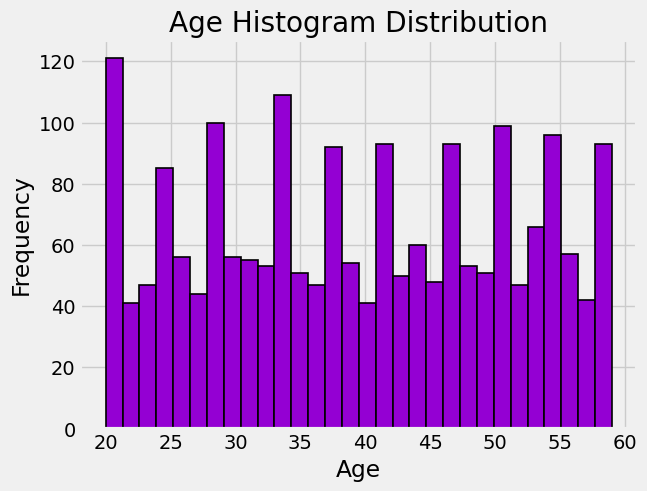

In [143]:
plot_histogram(new_df, 'Age', bins=30)

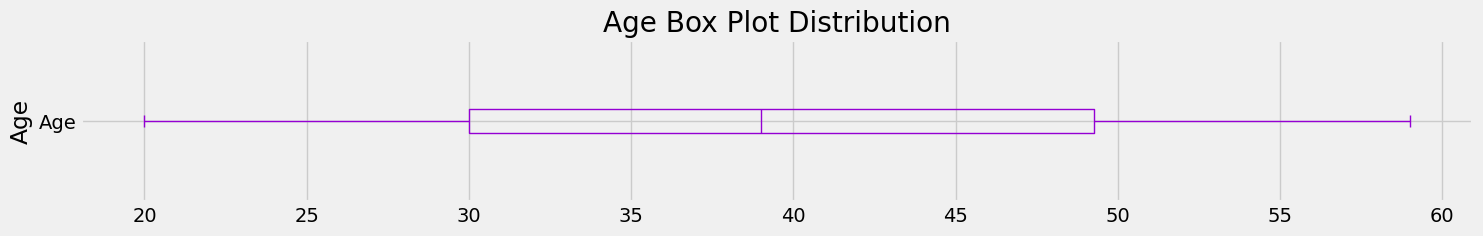

In [144]:
plot_box(new_df, 'Age')

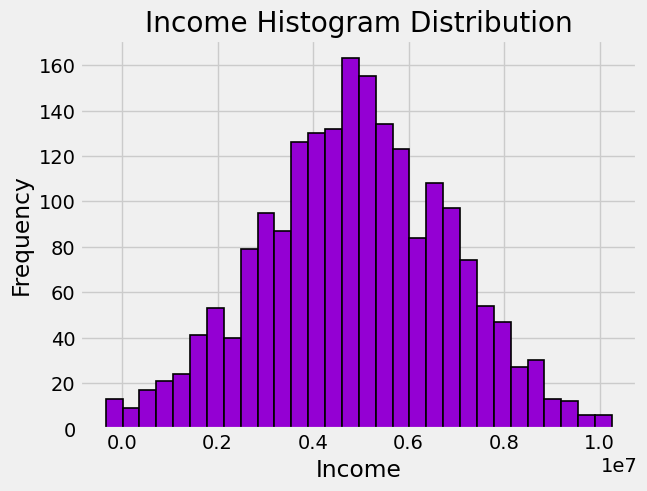

In [145]:
plot_histogram(new_df, 'Income', bins=30)

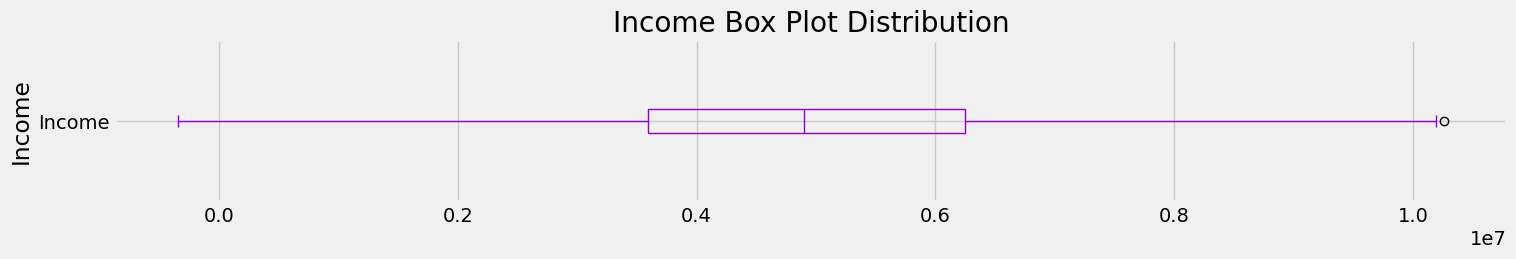

In [146]:
plot_box(new_df, 'Income')

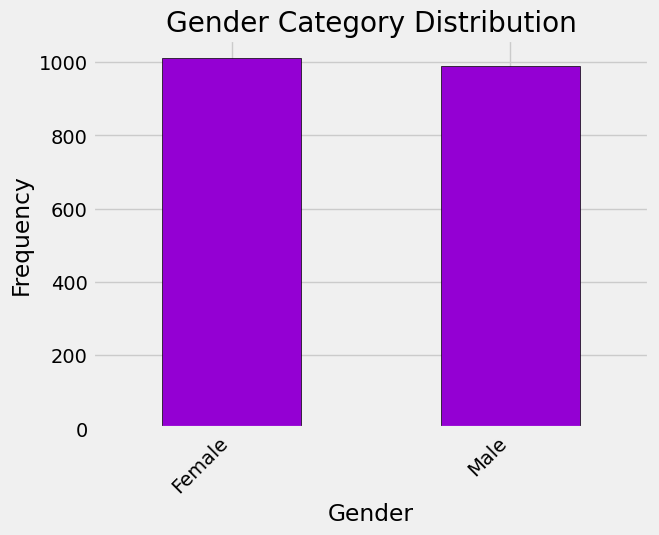

In [147]:
plot_histogram_string(new_df, 'Gender')

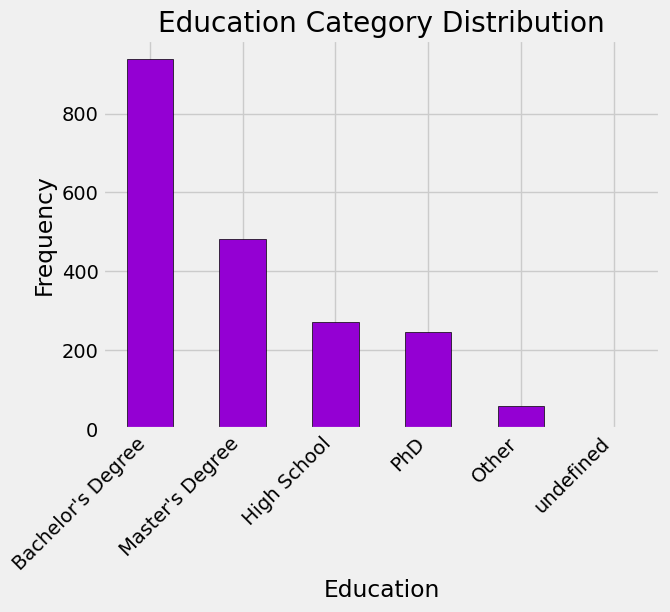

In [148]:
plot_histogram_string(new_df, 'Education')

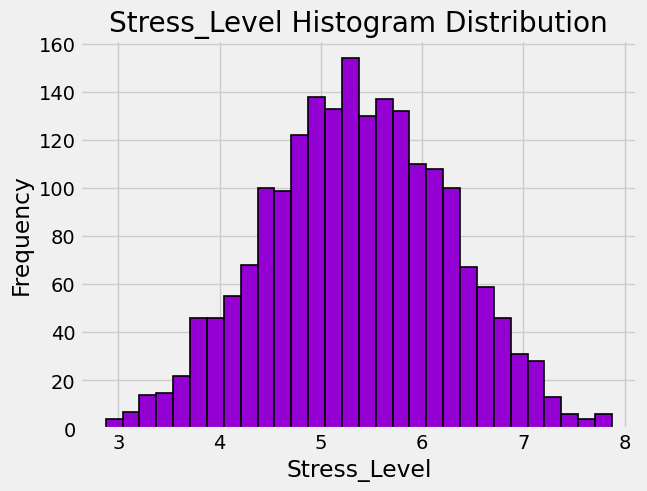

In [149]:
plot_histogram(new_df, 'Stress_Level', bins=30)

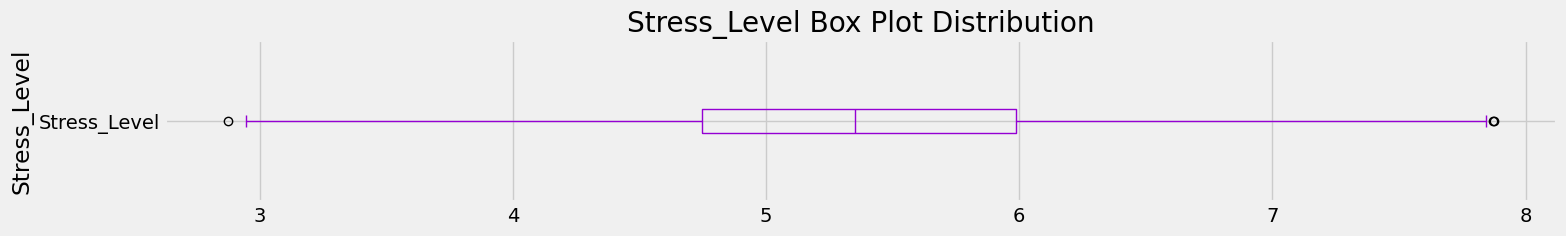

In [150]:
plot_box(new_df, 'Stress_Level')

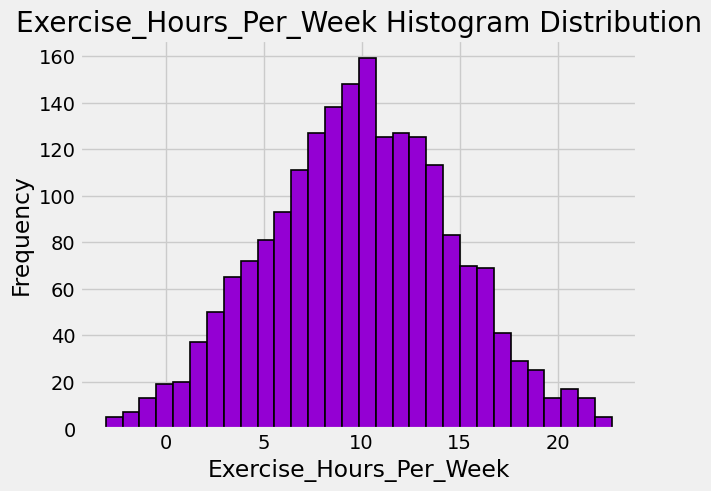

In [151]:
plot_histogram(new_df, 'Exercise_Hours_Per_Week', bins=30)

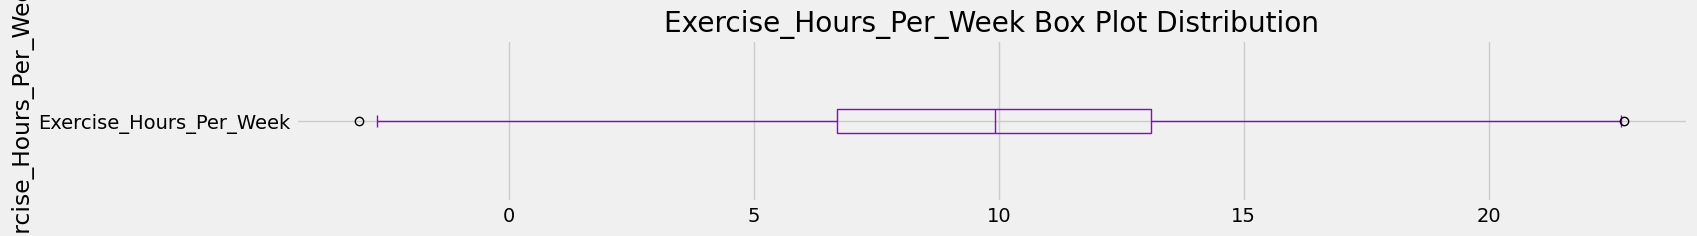

In [152]:
plot_box(new_df, 'Exercise_Hours_Per_Week')

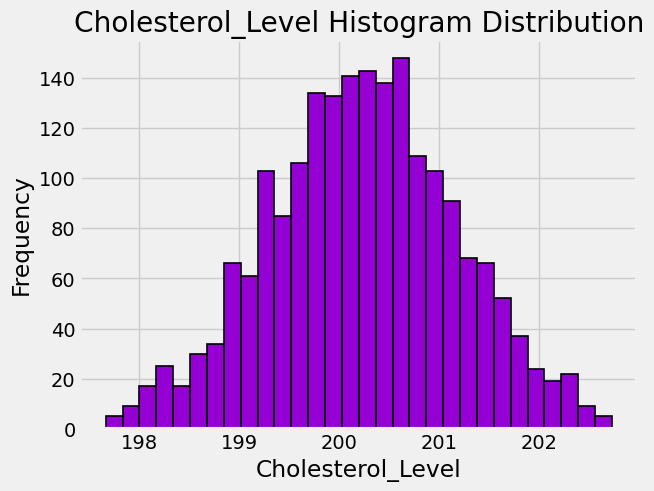

In [153]:
plot_histogram(new_df, 'Cholesterol_Level', bins=30)

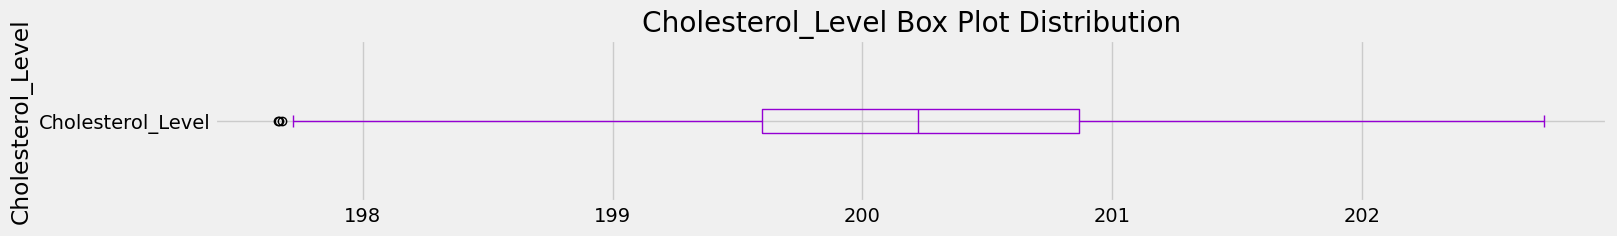

In [154]:
plot_box(new_df, 'Cholesterol_Level')

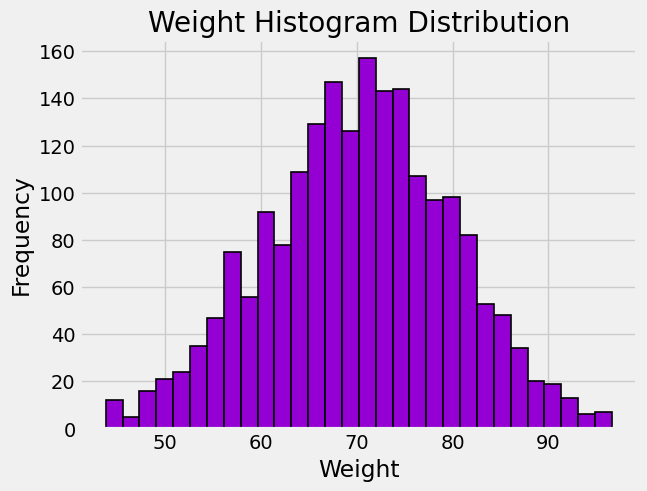

In [155]:
plot_histogram(new_df, 'Weight', bins=30)

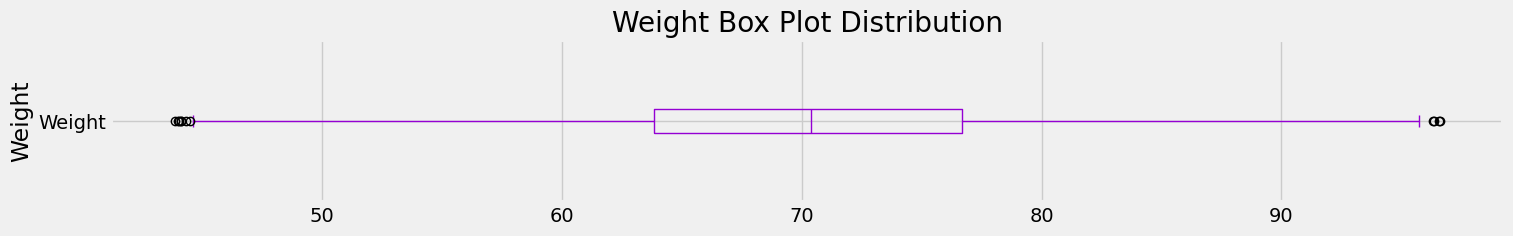

In [156]:
plot_box(new_df, 'Weight')

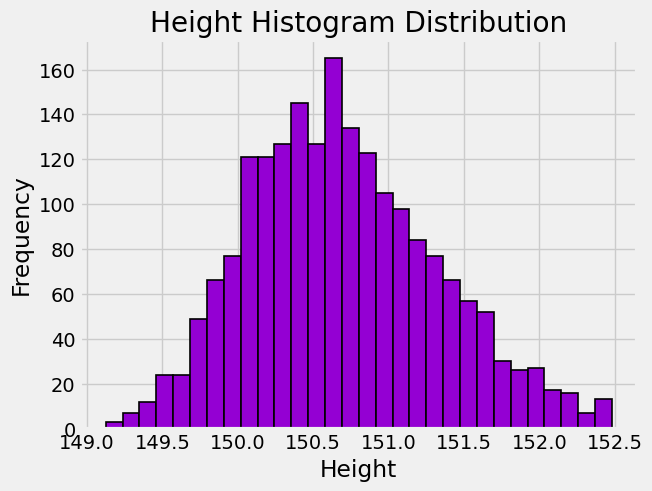

In [157]:
plot_histogram(new_df, 'Height', bins=30)

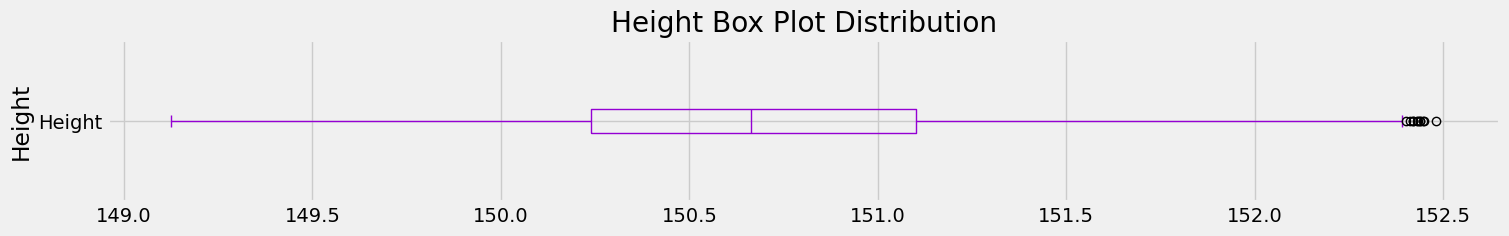

In [158]:
plot_box(new_df, 'Height')

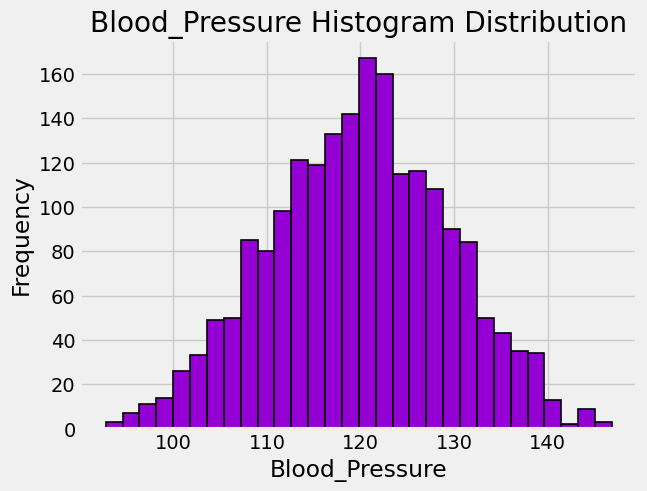

In [159]:
plot_histogram(new_df, 'Blood_Pressure', bins=30)

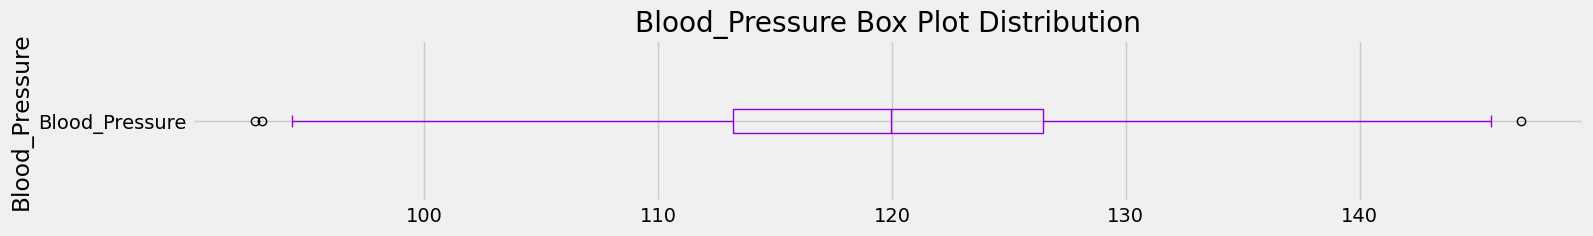

In [160]:
plot_box(new_df, 'Blood_Pressure')

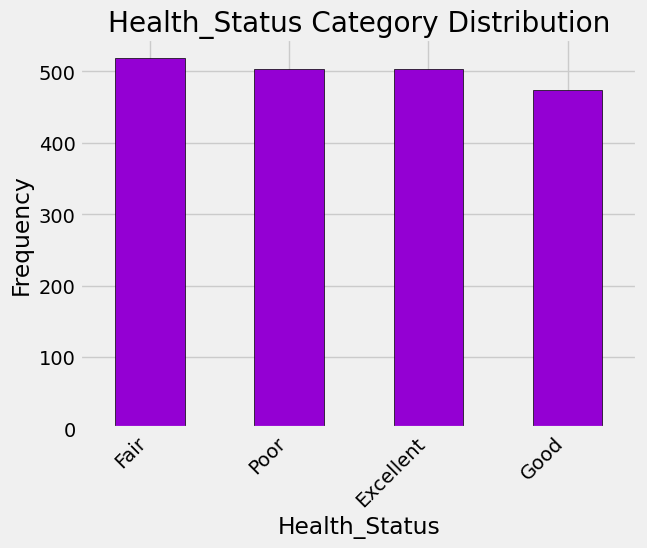

In [161]:
plot_histogram_string(new_df, 'Health_Status')

### 4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

Berdasarkan hasil visualisasi data di atas, distribusi data adalah sebagai berikut:
1. Age: Uniform
2. Income: Normal
3. Stress_Level: Normal
4. Exercise_Hours_Per_Week: Normal
5. Cholesterol_Level: Normal
6. Weight: Normal
7. Height: Normal
8. Blood_Pressure: Normal